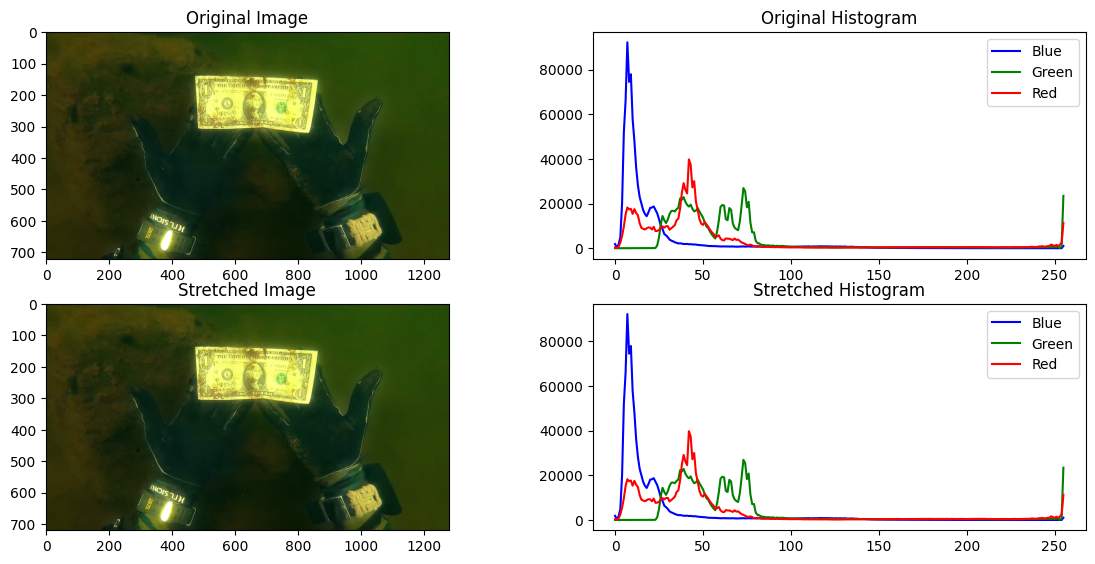

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def histogram_stretching(image):
    b, g, r = cv2.split(image)

    b_stretched = stretch_channel(b)
    g_stretched = stretch_channel(g)
    r_stretched = stretch_channel(r)

    stretched_image = cv2.merge((b_stretched, g_stretched, r_stretched))

    return stretched_image

def stretch_channel(channel):

    min_val = np.min(channel)
    max_val = np.max(channel)

    stretched_channel = ((channel - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    return stretched_channel

# image = cv2.imread('C:/College Projects/Applied LA for ML/5426a351-39e9-478c-8775-5fbcd69d30e5/raw/raw-890/15426.png')
image=cv2.imread('output.png')

stretched_image = histogram_stretching(image)

cv2.imwrite('stretched_image.png', stretched_image)

hist_original_b = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_original_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_original_r = cv2.calcHist([image], [2], None, [256], [0, 256])

hist_stretched_b = cv2.calcHist([stretched_image], [0], None, [256], [0, 256])
hist_stretched_g = cv2.calcHist([stretched_image], [1], None, [256], [0, 256])
hist_stretched_r = cv2.calcHist([stretched_image], [2], None, [256], [0, 256])

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.plot(hist_original_b, color='b', label='Blue')
plt.plot(hist_original_g, color='g', label='Green')
plt.plot(hist_original_r, color='r', label='Red')
plt.title('Original Histogram')
plt.legend()

plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB))
plt.title('Stretched Image')

plt.subplot(3, 2, 4)
plt.plot(hist_stretched_b, color='b', label='Blue')
plt.plot(hist_stretched_g, color='g', label='Green')
plt.plot(hist_stretched_r, color='r', label='Red')
plt.title('Stretched Histogram')
plt.legend()

plt.show()
